### 3-variable Lotka-Volterra equation
$$
\frac{dX_i}{dt} = X_i (\gamma_i + \sum_j \alpha_{ij} X_j) 
$$
For $X=\{I,Z,E\}$, intensities of ion-scale turbulence, ion-scale zonal flows, electron-scale turbulence, resprectively,
$$
\frac{dI}{dt} = I (a_0 - a_1 I - a_2 Z - a_3 E)
$$
$$
\frac{dZ}{dt} = Z (-b_0 + b_1 I - b_2 Z - b_3 E)
$$
$$
\frac{dE}{dt} = E (c_0 - c_1 I - c_2 Z - c_3 E)
$$
where all $a_i$, $b_i$, $c_i$ are assumed to be positive.

- Ion-scale turbulence and electron-scale turbulence are linearly unstable ($a_0>0, c_0>0$).  
- Zonal flow is linearly stable ($-b_0<0$) and nonlinearly driven by ion-scale turbulence ($b_1 I Z>0$).
- Cross-scale coupling $a_3, b_3, c_1, c_2$ are mutually exclusive.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from solve_Lotka_Volterra import solve_Lotka_Volterra, \
                                 sat_I_with_given_E, sat_Z_with_given_E, sat_E_with_given_I_Z, \
                                 sat_I_ratio_with_given_a3E_b3E, sat_Z_ratio_with_given_a3E_b3E, \
                                 equilibrium_IZE, dIdt_dZdt_with_sat_E
from time import time as timer

matA=np.array([[0.1, -0.3, -0.25, -0.1],
               [-0.1, 0.1, -0.1, -1.0],
               [20.0, -10.0, -2.0, -200.0]])
matA_wo_cross = matA.copy()
matA_wo_cross[0,3] = 0.0
matA_wo_cross[1,3] = 0.0
matA_wo_cross[2,1:3] = 0.0

dt = 0.001
nt = 200001

t1 = timer()
var0 = np.array([1e-3,1e-3,1e-3]) # Initial values
time, var = solve_Lotka_Volterra(matA,dt,nt,var0)
time, var_wo_cross = solve_Lotka_Volterra(matA_wo_cross,dt,nt,var0)
t2 = timer(); print(t2-t1)

1.1406137943267822


[[0.         0.         0.        ]
 [0.         0.         0.1       ]
 [0.33333333 0.         0.        ]
 [0.30508475 0.         0.08474576]]


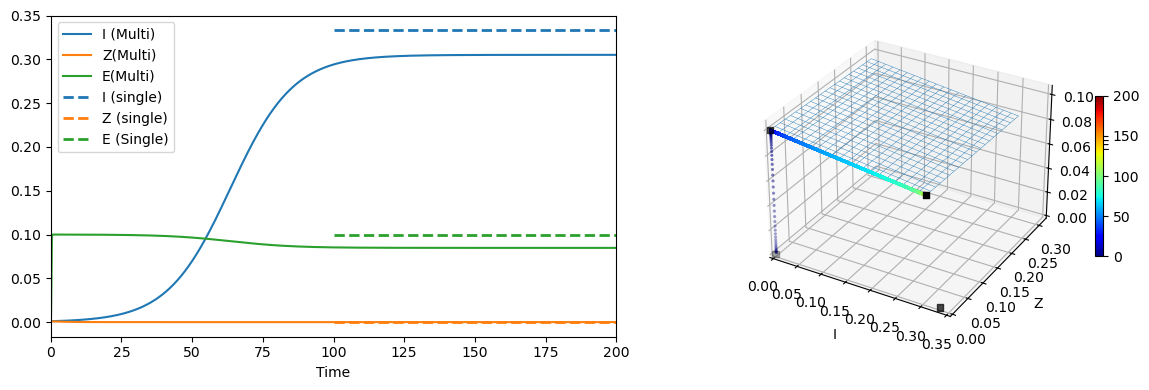

In [2]:
_, a1, a2, a3 = -matA[0,:]
b0, _, b2, b3 = -matA[1,:]
_, c1, c2, c3 = -matA[2,:]
a0 = matA[0,0]
b1 = matA[1,1]
c0 = matA[2,0]

%matplotlib inline
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.plot(time,var)
ax.axhline(sat_I_with_given_E(matA,0.0),xmin=0.5,xmax=1,linestyle="dashed",lw=2,c="C0")
ax.axhline(sat_Z_with_given_E(matA,0.0),xmin=0.5,xmax=1,linestyle="dashed",lw=2,c="C1")
ax.axhline(matA[2,0]/(-matA[2,3]),xmin=0.5,xmax=1,linestyle="dashed",lw=2,c="C2")
ax.legend(["I (Multi)","Z(Multi)","E(Multi)","I (single)","Z (single)", "E (Single)"])
ax.set_xlim(time[0],time[-1])
ax.set_xlabel("Time")

equilibrium = equilibrium_IZE(matA)
print(equilibrium)
ax = fig.add_subplot(1,2,2,projection="3d")
iend=int(nt)
iskp=10
quad = ax.scatter(var[:iend:iskp,0],var[:iend:iskp,1],var[:iend:iskp,2],c=time[:iend:iskp],cmap="jet",marker=".",lw=0)
ax.scatter(equilibrium[:,0],equilibrium[:,1],equilibrium[:,2],marker="s",c="k")
wI = np.linspace(0,var[:,0].max(),400)
wZ = np.linspace(0,var[:,0:2].max(),420)
wI2,wZ2 = np.meshgrid(wI,wZ)
ax.plot_wireframe(wI2,wZ2,sat_E_with_given_I_Z(matA,wI2,wZ2),rstride=20,cstride=20,lw=0.3)
ax.set_xlabel("I")
ax.set_ylabel("Z")
ax.set_zlabel("E")
ax.set_xlim(0,None)
ax.set_ylim(0,None)
ax.set_zlim(0,None)
fig.colorbar(quad,shrink=0.5)
fig.tight_layout()
plt.show()

# # Check single scale
# fig = plt.figure(figsize=(12,4))
# ax = fig.add_subplot(1,2,1)
# ax.plot(time,var_wo_cross)
# ax.axhline(sat_I_with_given_E(matA,0.0),xmin=0.5,xmax=1,linestyle="dashed",lw=2,c="C0")
# ax.axhline(sat_Z_with_given_E(matA,0.0),xmin=0.5,xmax=1,linestyle="dashed",lw=2,c="C1")
# ax.axhline(matA[2,0]/(-matA[2,3]),xmin=0.5,xmax=1,linestyle="dashed",lw=2,c="C2")
# ax.legend(["I (Single)","Z (Single)","E (Single)","I (Single)","Z (Single)", "E (Single)"])
# ax.set_xlim(time[0],time[-1])
# ax.set_xlabel("Time")
# plt.show()

# %matplotlib qt
# fig = plt.figure()
# ax = fig.add_subplot(projection="3d")
# quad = ax.scatter(var[:iend:iskp,0],var[:iend:iskp,1],var[:iend:iskp,2],c=time[:iend:iskp],cmap="jet",marker=".",lw=0)
# wI = np.linspace(0,var[:,0].max(),400)
# wZ = np.linspace(0,var[:,0:2].max(),420)
# wI2,wZ2 = np.meshgrid(wI,wZ)
# ax.plot_wireframe(wI2,wZ2,sat_E_with_given_I_Z(matA,wI2,wZ2),rstride=20,cstride=20,lw=0.3)
# ax.set_xlabel("I")
# ax.set_ylabel("Z")
# ax.set_zlabel("E")
# fig.colorbar(quad)
# fig.tight_layout()
# plt.show()

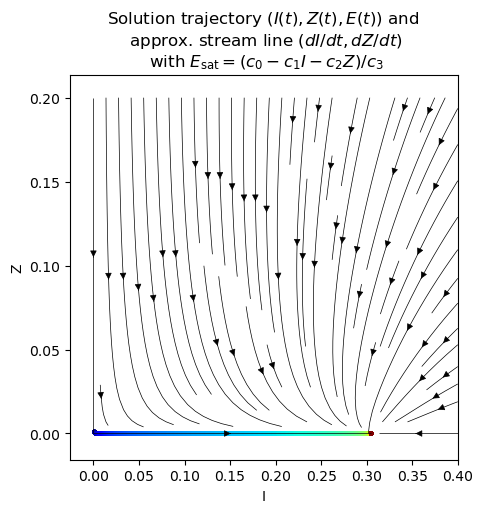

In [5]:
grid_I = np.linspace(0,0.4,200)
grid_Z = np.linspace(0,0.2,180)
I2, Z2 = np.meshgrid(grid_I, grid_Z)
dIdt, dZdt = dIdt_dZdt_with_sat_E(matA,I2,Z2)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1,1,1)
ax.set_title(label="Solution trajectory $(I(t),Z(t), E(t))$ and \n"
             +" approx. stream line $(dI/dt,dZ/dt)$ \n"
             +" with $E_\mathrm{sat}=(c_0-c_1I-c_2Z)/c_3$")
ax.streamplot(I2, Z2, dIdt, dZdt, linewidth=0.5, color="k")
ax.scatter(var[:iend:iskp,0],var[:iend:iskp,1],c=time[:iend:iskp],cmap="jet",marker=".",lw=0)
ax.set_xlabel("I")
ax.set_ylabel("Z")
plt.show()

/home/smaeyama/github/3sp-Lotka-Volterra/lotka_volterra_3sp/solve_Lotka_Volterra.py:109: RuntimeWarning: invalid value encountered in divide
  return Z_multi/Z_single


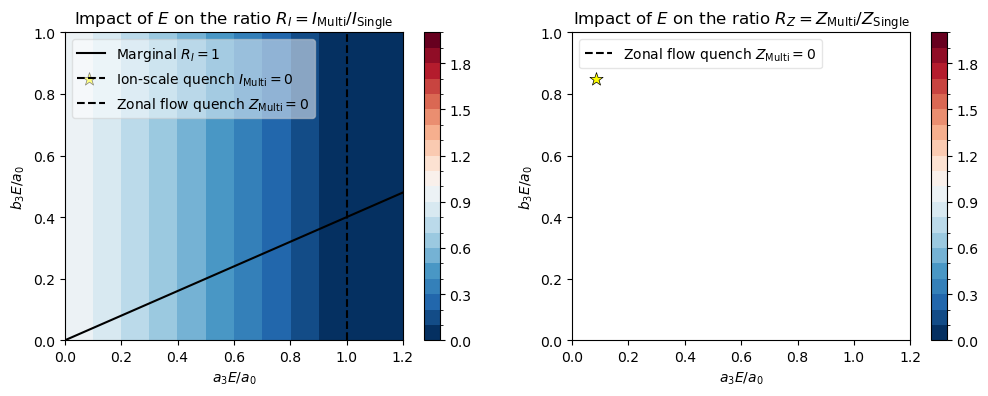

In [4]:
%matplotlib inline

cmap = plt.cm.RdBu_r  # define the colormap
cmaplist = [cmap(i) for i in range(cmap.N)]
bounds = np.linspace(0,2,21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)


a3Emax = 1.2
b3Emax = 1.0
normalized_a3E = np.linspace(0,a3Emax,400)
normalized_b3E = np.linspace(0,b3Emax,420)
a3E,b3E = np.meshgrid(normalized_a3E,normalized_b3E)
fig = plt.figure(figsize=(12,4))
ax = fig.add_subplot(1,2,1)
ax.set_title(r"Impact of $E$ on the ratio $R_I = I_\mathrm{Multi}/I_\mathrm{Single}$")
quad = ax.pcolormesh(a3E,b3E,sat_I_ratio_with_given_a3E_b3E(matA,a3E*a0,b3E*a0),cmap=cmap,norm=norm)
ax.plot(normalized_a3E,b2/a2*normalized_a3E,label=r"Marginal $R_I=1$",c="k")
ax.axvline(a0/a0,label=r"Ion-scale quench $I_\mathrm{Multi}=0$",c="k",linestyle="dashed")
ax.plot(normalized_a3E,(-b0+(a0-(normalized_a3E*a0))*b1/a1)/a0,label=r"Zonal flow quench $Z_\mathrm{Multi}=0$",c="k",linestyle="dashed")
ax.scatter(a3*var[-1,2]/a0,b3*var[-1,2]/a0,s=100,marker="*",c="yellow",edgecolors="k",lw=0.5)
ax.set_xlabel(r"$a_3 E / a_0$")
ax.set_ylabel(r"$b_3 E / a_0$")
ax.set_xlim(0,a3Emax)
ax.set_ylim(0,b3Emax)
ax.legend(loc="upper left",framealpha=0.5)
fig.colorbar(quad)
(a0-a3E)*b1/a1-(b0+b3E)<0
ax = fig.add_subplot(1,2,2)
ax.set_title(r"Impact of $E$ on the ratio $R_Z = Z_\mathrm{Multi}/Z_\mathrm{Single}$")
quad = ax.pcolormesh(a3E,b3E,sat_Z_ratio_with_given_a3E_b3E(matA,a3E*a0,b3E*a0),cmap=cmap,norm=norm)
ax.plot(normalized_a3E,(-b0*(1+a2*b1/(a1*b2))+b1*(a0/a1+a2*b0/(a1*b2))-b1*normalized_a3E*a0/a1)/a0,label=r"Zonal flow quench $Z_\mathrm{Multi}=0$",c="k",linestyle="dashed")
ax.scatter(a3*var[-1,2]/a0,b3*var[-1,2]/a0,s=100,marker="*",c="yellow",edgecolors="k",lw=0.5)
ax.set_xlabel(r"$a_3 E / a_0$")
ax.set_ylabel(r"$b_3 E / a_0$")
ax.set_xlim(0,a3Emax)
ax.set_ylim(0,b3Emax)
ax.legend(loc="upper left",framealpha=0.5)
fig.colorbar(quad)
plt.show()